In [313]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [314]:
data = pd.read_csv("ex1data2.txt", names=["X1","X2","y"])

In [315]:
data.head()

,X1,X2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [316]:
# feature normalization (mu-x)/std

In [317]:
def feature_normalization(data):
    
    X_num = len(data.columns)-1
    means = [None] * X_num
    stds = [None] * X_num
    
    for x in range(X_num):
        means[x] = data.iloc[:,x].mean()
        stds[x] = data.iloc[:,x].std()
        # (mu - x)/std
        data.iloc[:,x] = (means[x] - data.iloc[:,x]) / stds[x]
        
    return data, means, stds

In [318]:
data, X_means, X_stds = feature_normalization(data)
print(data.head())
print(X_means, X_stds)

         X1        X2       y
0 -0.130010  0.223675  399900
1  0.504190  0.223675  329900
2 -0.502476  0.223675  369000
3  0.735723  1.537767  232000
4 -1.257476 -1.090417  539900
[2000.6808510638298, 3.1702127659574466] [794.7023535338897, 0.7609818867800999]


In [319]:
# parameters for gradient descent
m = len(data) # 47
X = np.hstack((np.ones((m)).reshape(m,1), data.iloc[:,0:2])) # 47x3
y = np.array(data['y']).reshape(m,1) # 47x1
theta = np.zeros((3)).reshape((3,1)) # 3x1
theta = theta.astype('float64')
alpha = 0.01;
num_iters = 400;

In [320]:
# cost function
def J(X,y,theta):
    m = len(y)
    std_err = np.dot(X,theta) - y
    return np.squeeze(1/(2*m) * np.dot(std_err.T, std_err))

In [321]:
# cost for theta(0,0,0)
print(J(X,y,theta))

65591548106.45744


In [322]:
def gradient_descent(X,y,theta,alpha,num_iters):
    m = len(y)
    J_history = []
    
    for i in range(0, num_iters):
        stderr = np.dot(X,theta) - y # 47x1
        for j in range(0, np.shape(X)[1]):
            theta[j] = theta[j] - alpha * 1/m * sum([se*x for se,x in zip(stderr,X[:,j])])
        J_history.append(J(X,y,theta))
    
    return theta, J_history

In [323]:
th, J_h = gradient_descent(X,y,theta,alpha,num_iters)

In [324]:
th

array([[ 334302.06399328],
       [-100087.11600585],
       [  -3673.54845093]])

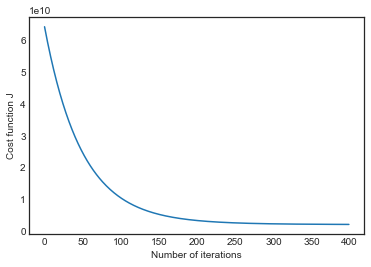

In [325]:
plt.plot(range(0,num_iters), J_h)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()

#### Selecting different learning rates

[[ 340412.65946457]
 [-110620.71499885]
 [   6639.13899083]]


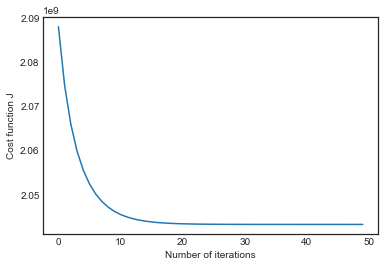

In [326]:
alpha = 0.3;
num_iters = 50;
th, J_h = gradient_descent(X,y,theta,alpha,num_iters)

print(th)

plt.plot(range(0,num_iters), J_h)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()

[[ 340412.6595739 ]
 [-110629.90635286]
 [   6648.33034483]]


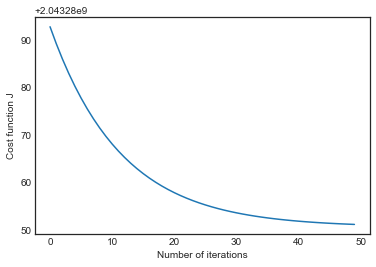

In [327]:
alpha = 0.1;
num_iters = 50;
th, J_h = gradient_descent(X,y,theta,alpha,num_iters)

print(th)

plt.plot(range(0,num_iters), J_h)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()

[[ 340412.65957434]
 [-110630.45322557]
 [   6648.87721754]]


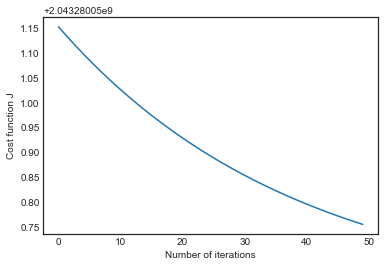

In [328]:
alpha = 0.03;
num_iters = 50;
th, J_h = gradient_descent(X,y,theta,alpha,num_iters)

print(th)

plt.plot(range(0,num_iters), J_h)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()

[[ 340412.65957439]
 [-110630.56911583]
 [   6648.9931078 ]]


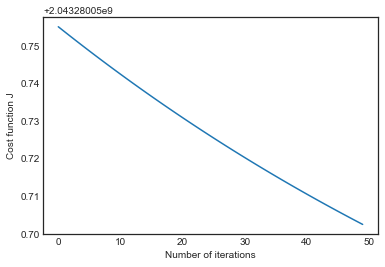

In [329]:
alpha = 0.01;
num_iters = 50;
th, J_h = gradient_descent(X,y,theta,alpha,num_iters)

print(th)

plt.plot(range(0,num_iters), J_h)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()